# Assumptions of Linear Regression

Linear regression is an analysis that assesses whether one or more predictor variables explain the dependent (criterion) variable.  The regression has five key assumptions:

   * Linear relationship
   * Multivariate normality
   * No or little multicollinearity
   * No auto-correlation
   * Homoscedasticity
 
A note about sample size.  In Linear regression the sample size rule of thumb is that the regression analysis requires at least 20 cases per independent variable in the analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline
import statsmodels.formula.api as smf

## import data
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

data.head()
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales

results = smf.ols(formula='sales ~ TV + radio', data=data).fit()
Y_pred = results.predict(X)
residual = y.values - Y_pred
residual

1      1.544535
2     -1.945362
3     -3.037018
4      0.882884
5     -0.323908
6     -5.312084
7      0.081788
8      1.094484
9      1.090621
10    -1.951697
11     1.564140
12     0.143480
13    -1.408662
14     0.889049
15     0.555332
16     1.571085
17    -0.403865
18     1.158924
19     1.358785
20     0.446154
21    -0.121392
22    -2.242064
23    -0.914172
24    -1.044027
25     1.559648
26    -3.608021
27     0.032306
28    -1.146335
29    -0.499541
30     1.340703
         ...   
171    1.010426
172    0.123154
173    0.003422
174   -0.260970
175   -2.236151
176    2.216474
177    0.235978
178   -0.474924
179   -4.213844
180    0.221960
181   -0.075089
182   -1.733696
183    2.135912
184    2.036064
185   -0.937949
186    1.820623
187    0.601316
188    0.239721
189   -2.720097
190    0.648555
191   -1.654978
192    1.494074
193    1.421141
194    1.151239
195    0.836810
196    2.235488
197    1.547625
198    0.031952
199    1.707077
200   -1.757543
Length: 200, dtype: floa

1. linear regression needs the relationship between the independent and dependent variables to be linear.  It is also important to check for outliers since linear regression is sensitive to outlier effects.  The linearity assumption can best be tested with scatter plots, the following two examples depict two cases, where no and little linearity is present.

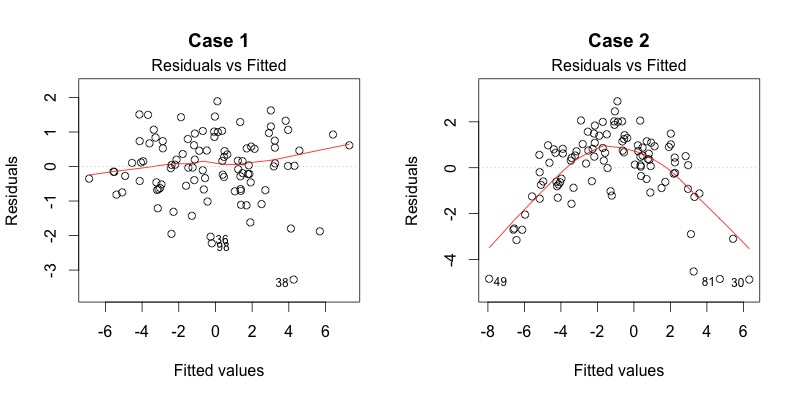

In [38]:
from IPython.display import Image
Image(filename = "/Users/tecqnio/Acadgild/LinearRegression/Images/nonl.jpeg", width=800, height=800)

2.  Normality of Residuals/Y

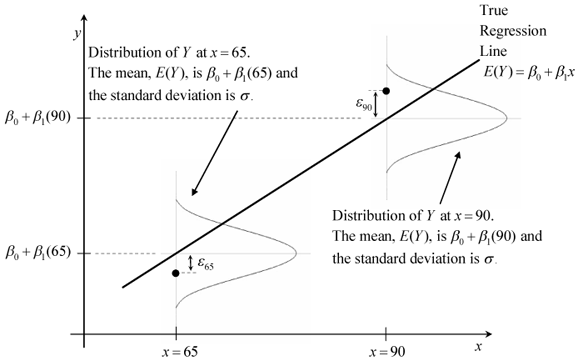

In [37]:
from IPython.display import Image
Image(filename = "/Users/tecqnio/Acadgild/LinearRegression/Images/normalerror.png", width=800, height=800)

In [5]:
## How to check - 2 ways

# 1.Shapiro-Wilk Test

## H0: variable is normal
#Ha: Variable is not Normal

from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
dummy = 5 * randn(100) + 50
# normality test
stat, p = shapiro(residual)

alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)') # null hypothesis is  normal;
else:
    print('Sample does not look Gaussian (reject H0)')
    
p

Sample does not look Gaussian (reject H0)


4.190036317908152e-09

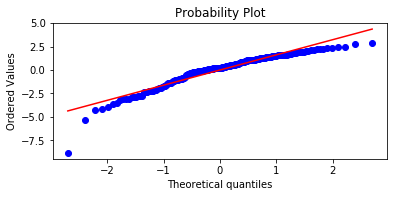

In [9]:
# 2. Q-Q Plot - We can apply normal probability plot to assess

import scipy as sp
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,2.5))

a, (__,  ___,r) = sp.stats.probplot(residual, plot=ax, fit=True)
#(osm, osr) : tuple of ndarrays

If the errors are not normally distributed, non – linear transformation of the variables
(response or predictors) can bring improvement in the model.
Normality can also be checked with a goodness of fit test (e.g., the Kolmogorov-Smirnov test),



3. Homosckedasticity - The error terms must have constant variance. This phenomenon is known as homoskedasticity.
The presence of non-constant variance is referred to heteroskedasticity

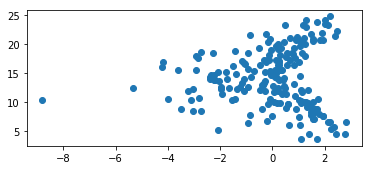

In [13]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, Y_pred)

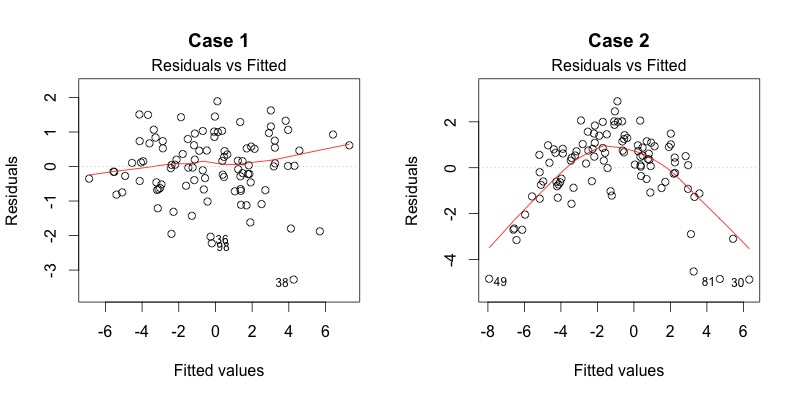

In [14]:
from IPython.display import Image
Image(filename = "/Users/tecqnio/Acadgild/LinearRegression/Images/nonl.jpeg", width=800, height=800)

In [15]:
from statsmodels.stats import diagnostic
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
# null hypo - homos
test = diagnostic.het_breuschpagan(residual, results.model.exog)
print(*zip(name, test))

# Parameters
# resid (array-like) – For the Breusch-Pagan test, this should be the residual of a regression.
# exog_het (array_like) – This contains variables that might create data dependent heteroscedasticity.
# H0: Homoschedasticity

('Lagrange multiplier statistic', 4.8092998659394315) ('p-value', 0.09029710011529447) ('f-value', 2.4269395850810342) ('f p-value', 0.0909429273412957)


4. Multi-collinearity - The independent variables should not be  correlated. 

########  multicollinearity check ####################################

Multicollinearity may be checked multiple ways:

1) Correlation matrix – When computing a matrix of Pearson’s bivariate correlations 
among all independent variables, the magnitude of the correlation coefficients should be less than .80.


In [23]:
corr = X.corr()
print(corr)
X['TV'].corr(X['radio'])

             TV     radio
TV     1.000000  0.054809
radio  0.054809  1.000000


0.054808664465830034

2) Variance Inflation Factor (VIF) – The VIFs of the linear regression 
indicate the degree that the variances in the regression estimates are increased due to multicollinearity.
VIF values higher than 10 indicate that multicollinearity is a problem.

In [11]:
##### Vif Function to calculate the VIF for explanatory variables
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,len(xvar_names)):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print(xvar_names[i], " VIF = " , vif)

In [12]:
vif_cal(input_data=data, dependent_col="sales")

TV  VIF =  1.0
radio  VIF =  1.14
newspaper  VIF =  1.15


5. No Auto-Correlation - There should be no correlation between the residual (error) terms.

Test used is Durbin Watson test

- Value 0 to <2 is positive autocorrelation (common in time series data).

- Value >2 to 4 is negative autocorrelation (less common in time series data).